In [139]:
from sklearn.datasets import fetch_california_housing, load_digits
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from IPython.display import SVG
from graphviz import Source
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import time

First I will run the analysis on the iris dataset...

In [142]:
#load in the data
housing = fetch_california_housing()
X = housing.data
y = housing.target

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [143]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [148]:
accuracy_list = []

for i in range(5,21,5):
    clf = AdaBoostRegressor(DecisionTreeRegressor(max_depth=i),n_estimators=50)
    start = time.time()
    myerror = np.mean(cross_val_score(clf, X, y, verbose = 1, cv=3, error_score='raise'))
    end = time.time()
    elapsed = end - start
    accuracy_list.append([i, myerror, elapsed])
    
print('im done')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   10.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


im done


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   12.4s finished


In [152]:
display(accuracy_list)

[[5, 'mae', 0.45770452434904635, 3.715723752975464],
 [10, 'mae', 0.6490959381666261, 6.971263647079468],
 [15, 'mae', 0.6416336741515364, 10.650341510772705],
 [20, 'mae', 0.6400102874133538, 12.505161046981812]]

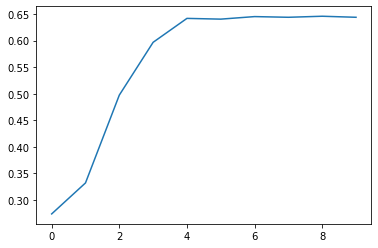

In [128]:
#depth 2 has higher in sample accuracy but performs worse out of sample
plt.plot(accuracy_list)

Then I will run it on the mnist dataset...

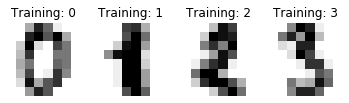

In [156]:
#load in the data
digits = load_digits()

#show ample digits
#taken from: https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#sphx-glr-auto-examples-classification-plot-digits-classification-py
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

In [157]:
#no need to scale this data
X = digits.data
y = digits.target
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [158]:
accuracy_list = []

for i in range(1,16):
    clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=i))
    accuracy_list.append(np.mean(cross_val_score(clf, X, y, cv=3)))
    
print('im done')

im done


In [160]:
display(accuracy_list)

[0.2621329033193222,
 0.46833711582722276,
 0.734619936510385,
 0.8425654809318545,
 0.8826076353680109,
 0.9210140654624502,
 0.929364307385347,
 0.9343476402540037,
 0.9398902293211601,
 0.9415737117661114,
 0.9432153174642673,
 0.8442849308493313,
 0.7791250199317804,
 0.7813204471572966,
 0.7907362599633001]

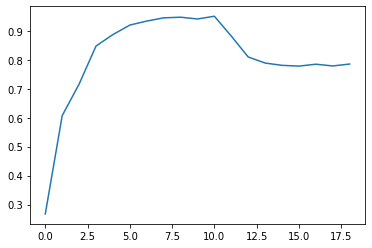

In [105]:
plt.plot(accuracy_list)